## Semantic Role Labeling metrics

In [44]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score, accuracy_score
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [45]:
arg_pred = np.load("./predictions_srl_det/argument_eval.npy")
arg_real = np.load("./predictions_srl_det/arg_real_eval.npy")
mask = np.load("./predictions_srl_det/f_mask_eval.npy")
detection = np.load("./predictions_srl_det/detection_eval.npy")


TP: 575  
FN: 62 
FP_v: 62
F_det: 99 
precision= 0.781250 
recall= 0.902669
f1-score = 0.837582
accuracy = 0.720551


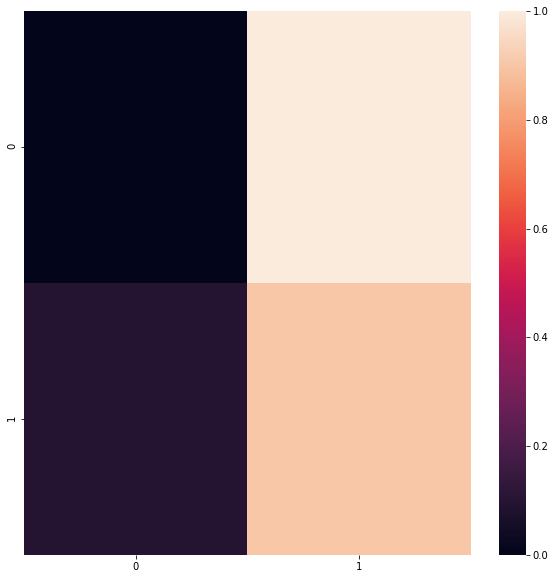

In [53]:
##### just argument detection

a = np.exp(detection)
probs = a / np.expand_dims(np.sum(a, axis=2),axis=-1)
is_arg = (probs[:,:,1] > 0.5)
fin_mask = (arg_real> 0) | is_arg


y_pre, y_true  = (arg_real>0)[fin_mask].flatten(), is_arg[fin_mask].flatten()

TP,FN , F_det, FP_v = 0,0,0,0
for i,j in zip(y_pre, y_true):
    if i==j and i!= 0:
        TP += 1
    if j!=0 and i==0:
        FN +=1
    if (i!=0 and j==0):
        F_det +=1
    if (j!=0 and i!=j):
        FP_v += 1
        
print("TP: %d  \nFN: %d \nFP_v: %d\nF_det: %d " % (TP, FN, FP_v, F_det))

FP = F_det + FP_v

precision = TP/(TP+FP)
recall = TP/(TP+FN)

print("precision= %f \nrecall= %f"%(precision, recall))


f1 = 2*(precision*recall)/(precision+recall)

print("f1-score = %f"%(f1))


accuracy = TP/(TP + FN + FP)
print("accuracy = %f" % (accuracy))


cm = confusion_matrix(y_true, y_pre)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sbn.heatmap(cm)

TP: 444  
FN: 103 
FP_v: 230
F_det: 40 
precision= 0.621849 
recall= 0.811700
f1-score = 0.704203
accuracy = 0.543452


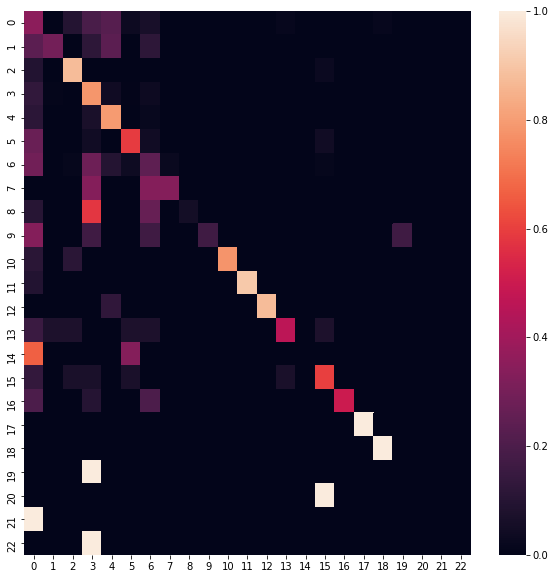

In [54]:
#### argument metrics for SRL

y_true, y_pre = arg_real[mask],  arg_pred[mask]

TP,FN , F_det, FP_v = 0,0,0,0
for i,j in zip(y_pre, y_true):
    if i==j and i!= 0:
        TP += 1
    if j!=0 and i==0:
        FN +=1
    if (i!=0 and j==0):
        F_det +=1
    if (j!=0 and i!=j):
        FP_v += 1
        
print("TP: %d  \nFN: %d \nFP_v: %d\nF_det: %d " % (TP, FN, FP_v, F_det))

FP = F_det + FP_v

precision = TP/(TP+FP)
recall = TP/(TP+FN)

print("precision= %f \nrecall= %f"%(precision, recall))


f1 = 2*(precision*recall)/(precision+recall)

print("f1-score = %f"%(f1))


accuracy = TP/(TP + FN + FP)
print("accuracy = %f" % (accuracy))
cm = confusion_matrix(y_true, y_pre)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sbn.heatmap(cm)